In [3]:
import os

import json
import matplotlib.pyplot as plt

In [1]:
def plot_stats(gens_dir):
    # get path to all json files in the directory
    json_files = [f for f in os.listdir(gens_dir) if f.endswith('.json')]
    json_files = [os.path.join(gens_dir, f) for f in json_files]
    print(f"Found {len(json_files)} json files in {gens_dir}")
    # read all json files
    gens_data = []
    for f in json_files:
        with open(f) as jf:
            gens_data.append(json.load(jf))
    # we will have several plots
    # - histogram of request times 
    # - histogram of total completion tokens
    # - histogram of average request times per completion
    # - histogram of average tokens per completion
    # for the averages, the values we want are the request times and tokens divided by the number of completions

    # iterate over the data and save the values we want

    request_times = []
    completion_tokens = []
    total_tokens = []
    valid_ratios = []

    for gen in gens_data:
        request_times.append(gen["request_time"])
        completion_tokens.append(gen["usage"]["completion_tokens"])
        total_tokens.append(gen["usage"]["total_tokens"])
        valid_ratio = gen["n_can_parse"] / gen["n_requested"]
        valid_ratios.append(valid_ratio)

    # plot histograms
    fig, axs = plt.subplots(4, 1)
    axs[0].hist(request_times, bins=20)
    axs[0].set_title('Request times')
    axs[1].hist(completion_tokens, bins=20)
    axs[1].set_title('Completion tokens')
    axs[2].hist(total_tokens, bins=20)
    axs[2].set_title('Total tokens')
    axs[3].hist(valid_ratios, bins=20)
    axs[3].set_title('Valid ratios')
    # set the overall title to the directory name
    fig.suptitle(gens_dir)
    plt.tight_layout()
    plt.show()


Found 160 json files in dsl/v0_3/generations/gens_20241011_gpt-4o_n10


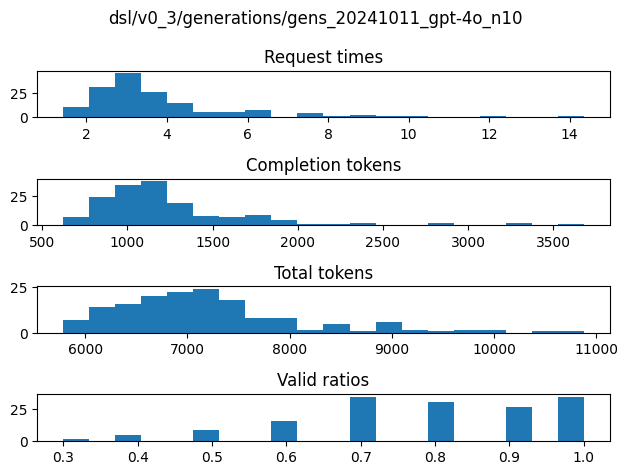

Found 160 json files in dsl/v0_3/generations/gens_20241011_gpt-4o_n100


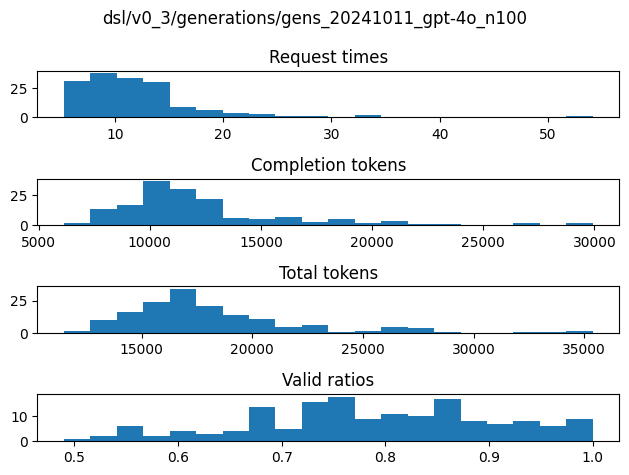

In [4]:
# gens_dir = "models/logs/gens_20241011T021207"

# arga_subet, n = 10
gens_dir = "dsl/v0_3/generations/gens_20241011_gpt-4o_n10"

plot_stats(gens_dir)

# arga_subet, n = 100
gens_dir = "dsl/v0_3/generations/gens_20241011_gpt-4o_n100"

plot_stats(gens_dir)